In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
PATH = os.path.join(os.curdir,'*.txt')
PATH = glob.glob(PATH, recursive=True)

In [3]:
dataset = pd.DataFrame()
for item in PATH:
    df = pd.read_csv(item, sep=',')
    dataset = pd.concat([dataset, df], axis=0)

In [4]:
dataset.sort_index(ascending=True)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.1800,27.272000,426.000000,721.250000,0.004793,1
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2015-02-04 17:51:59,23.1500,27.267500,429.500000,714.000000,0.004783,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [5]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)
dataset = dataset.sort_index(ascending=True)

In [6]:
dataset.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
dataset.index.max()

Timestamp('2015-02-18 09:19:00')

In [8]:
dataset.index.min()

Timestamp('2015-02-02 14:19:00')

In [9]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,20560.0,20.906212,1.055315,19.000000,20.200000,20.700000,21.525000,24.408333
Humidity,20560.0,27.655925,4.982154,16.745000,24.500000,27.290000,31.290000,39.500000
Light,20560.0,130.756622,210.430875,0.000000,0.000000,0.000000,301.000000,1697.250000
CO2,20560.0,690.553276,311.201281,412.750000,460.000000,565.416667,804.666667,2076.500000
HumidityRatio,20560.0,0.004228,0.000768,0.002674,0.003719,0.004292,0.004832,0.006476
Occupancy,20560.0,0.231031,0.421503,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
timestamp_s = dataset.index.map(pd.Timestamp.timestamp)
# Lets include day periodicity, this way model gets access to most important frequency features
day = 24 * 60 * 60

dataset['Day Sin'] = np.sin(timestamp_s * (2 * np.pi/day))
dataset['Day Cos'] = np.cos(timestamp_s * (2 * np.pi/day))

(-1027.95, 21586.95, -1.1, 1.1)

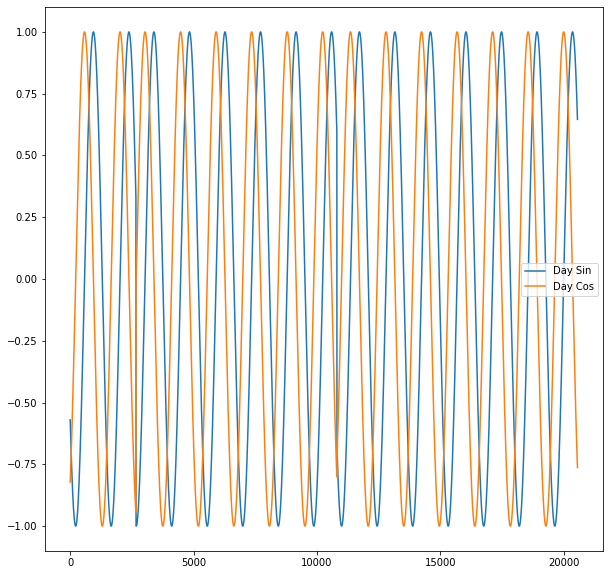

In [11]:
plt.figure(figsize=(10,10))
plt.plot(dataset['Day Sin'].to_numpy(), label='Day Sin')
plt.plot(dataset['Day Cos'].to_numpy(), label='Day Cos')
plt.legend()
plt.axis()

In [12]:
dataset.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day Sin,Day Cos
date,,,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,-0.569997,-0.821647
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,-0.573517,-0.819194
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,-0.577145,-0.816642
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,-0.580703,-0.814116
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,-0.584250,-0.811574


In [13]:
# Lets check the NULL Values first

null = pd.DataFrame(dataset.isnull().sum()).rename(columns={0:"Total"})
null['percentage'] = null['Total'] / len(dataset)
null.sort_values('percentage',ascending=False).head()

,Total,percentage
Temperature,0,0.0
Humidity,0,0.0
Light,0,0.0
CO2,0,0.0
HumidityRatio,0,0.0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20560 entries, 2015-02-02 14:19:00 to 2015-02-18 09:19:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    20560 non-null  float64
 1   Humidity       20560 non-null  float64
 2   Light          20560 non-null  float64
 3   CO2            20560 non-null  float64
 4   HumidityRatio  20560 non-null  float64
 5   Occupancy      20560 non-null  int64  
 6   Day Sin        20560 non-null  float64
 7   Day Cos        20560 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.4 MB


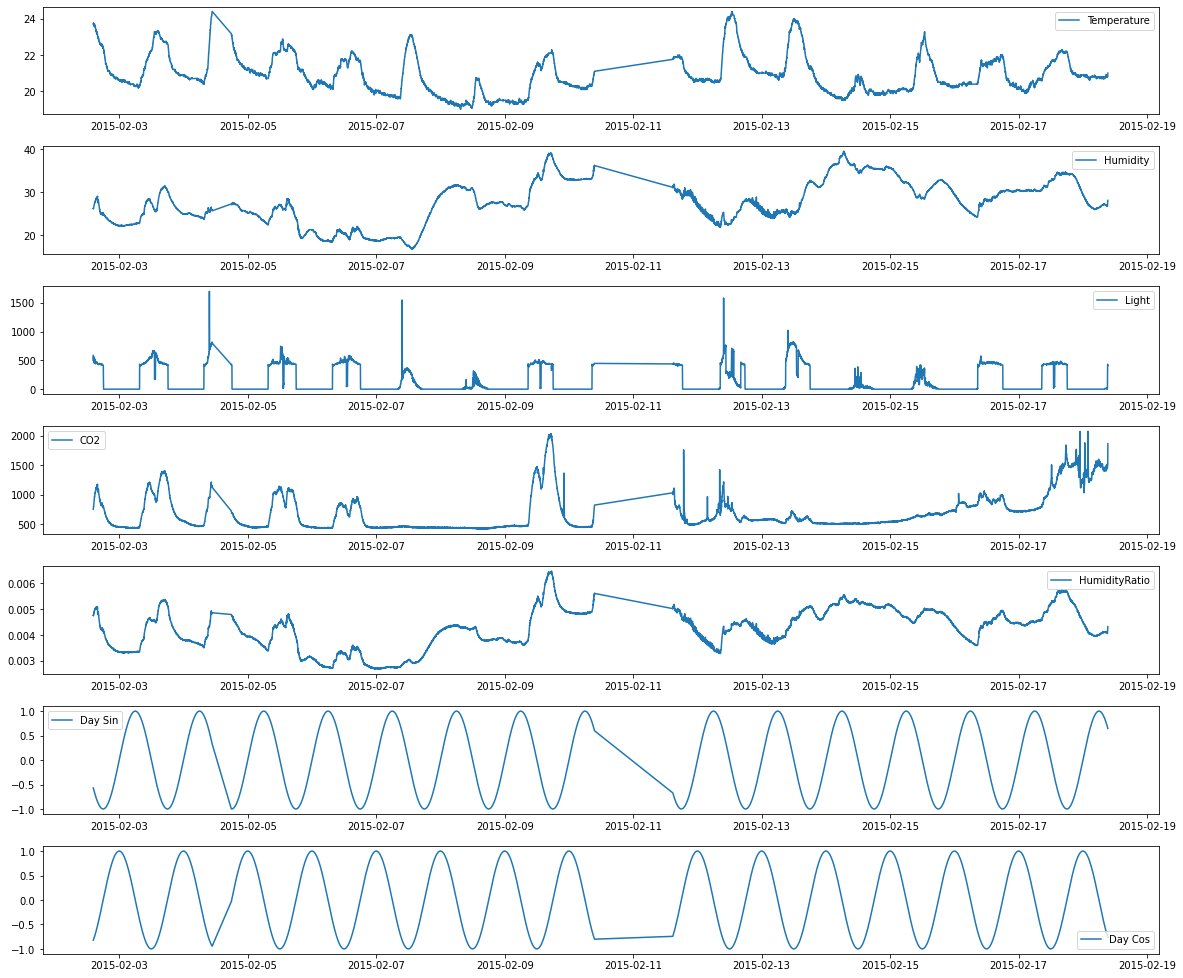

In [15]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(dataset.select_dtypes('float')):
    plt.subplot(len(dataset.columns), 1, idx+1)
    plt.plot(dataset[col], label=col)
    plt.legend()    
plt.subplots_adjust(hspace=0.3, wspace=0.5)

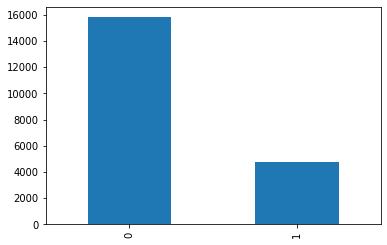

In [16]:
dataset.Occupancy.value_counts().plot(kind='bar')

In [17]:
negatives, positives = np.bincount(dataset.Occupancy)
total = negatives + positives  # We will use it to create bias intitalizers

In [18]:
train = dataset[ : int(len(dataset) * 0.7)]
val = dataset[int(len(dataset) * 0.7) : int(len(dataset) * 0.9)]
test = dataset[int(len(dataset) * 0.9):]

In [19]:
train.shape

(14391, 8)

In [20]:
train_label = train.Occupancy
train_data = train.drop(['Occupancy'], axis=1)

val_label = val.Occupancy
val_data = val.drop(['Occupancy'], axis=1)

test_data = test.drop(['Occupancy'], axis=1)
test_label = test.Occupancy


In [21]:
train_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Day Sin,Day Cos
date,,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,-0.569997,-0.821647
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,-0.573517,-0.819194
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,-0.577145,-0.816642
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,-0.580703,-0.814116
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,-0.584250,-0.811574


In [22]:
mean = train_data.mean()
std = train_data.std() + 1e-12

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std
test_data = (test_data - mean) / std

In [23]:
test_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Day Sin,Day Cos
date,,,,,,,
2015-02-16 23:04:00,-0.612816,0.935607,-0.649743,0.320997,0.616394,-0.324065,1.305729
2015-02-16 23:05:00,-0.651990,0.924863,-0.649743,0.322794,0.590135,-0.318136,1.307229
2015-02-16 23:06:00,-0.691165,0.935607,-0.649743,0.328187,0.583417,-0.312200,1.308704
2015-02-16 23:06:59,-0.612816,0.959244,-0.649743,0.313806,0.637907,-0.306357,1.310128
2015-02-16 23:08:00,-0.691165,0.935607,-0.649743,0.322195,0.583417,-0.300310,1.311573


In [24]:
train_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Day Sin,Day Cos
date,,,,,,,
2015-02-02 14:19:00,2.355756,0.050724,1.970081,0.440360,0.999288,-0.783298,-1.264724
2015-02-02 14:19:59,2.371426,0.054592,1.939639,0.480627,1.010496,-0.788225,-1.261205
2015-02-02 14:21:00,2.381872,0.041699,1.913972,0.513944,1.000593,-0.793304,-1.257544
2015-02-02 14:22:00,2.375343,0.019137,1.560678,0.532220,0.972395,-0.798284,-1.253920
2015-02-02 14:23:00,2.402766,0.035253,1.537622,0.547500,1.002494,-0.803249,-1.250275


In [25]:
train_data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Day Sin,Day Cos
count,1.439100e+04,1.439100e+04,1.439100e+04,1.439100e+04,1.439100e+04,1.439100e+04,1.439100e+04
mean,-2.037749e-12,-3.643175e-13,-1.384620e-15,-6.250299e-16,-3.071984e-14,-1.198788e-16,-5.393041e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.735824e+00,-1.996454e+00,-6.497426e-01,-7.692749e-01,-1.757339e+00,-1.385207e+00,-1.520562e+00
25%,-6.519903e-01,-7.168332e-01,-6.497426e-01,-6.497316e-01,-7.289520e-01,-1.013318e+00,-9.790784e-01
50%,-1.775412e-01,-5.213231e-02,-6.497426e-01,-4.178354e-01,-1.070026e-01,-9.857681e-03,6.994814e-02
75%,6.146583e-01,6.278968e-01,1.226037e+00,2.257214e-01,7.066508e-01,1.004365e+00,9.964810e-01
max,2.972395e+00,2.810988e+00,6.948508e+00,5.039814e+00,3.257111e+00,1.414351e+00,1.348338e+00


In [26]:
METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR')    
]

In [27]:
def create_model(input_shape, output_shape,output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(50, return_sequences=True, input_shape=[None, input_shape]),
        tf.keras.layers.LSTM(50),
        tf.keras.layers.Dense(output_shape, bias_initializer=output_bias,activation='sigmoid')
    ])
    return model

In [28]:
# Lets try non sequential loader
def create_non_sequential_loader(series, window_size=24, batchsize=32, buffersize=100):
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, drop_remainder=True, shift=1)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1,:-1],window[-1,-1]), num_parallel_calls=AUTOTUNE)
    dataset = dataset.cache().shuffle(buffersize).batch(batchsize)
    return dataset.prefetch(AUTOTUNE)

In [29]:
# Lets try non sequential loader
def val_create_non_sequential_loader(series, window_size=24, batchsize=32):
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, drop_remainder=True, shift=1)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.map(lambda window: (window[:-1,:-1],window[-1,-1]), num_parallel_calls=AUTOTUNE)
    dataset = dataset.cache().batch(batchsize)
    return dataset.prefetch(AUTOTUNE)

In [30]:
train = tf.concat([train_data.to_numpy(), train_label.to_numpy().reshape(-1,1)], axis=1)
val = tf.concat([val_data.to_numpy(), val_label.to_numpy().reshape(-1,1)], axis=1)

In [31]:
train = create_non_sequential_loader(train, window_size=60)
val = val_create_non_sequential_loader(val, window_size=60)

In [32]:
for X, Y in val.take(1):
    print(X.shape)
    print(Y.shape)
    
    print(X)
    print(Y)

(32, 60, 7)
(32,)
tf.Tensor(
[[[-1.04809007  2.20340975 -0.64974256 ...  1.55491062  0.87154082
    1.04809247]
  [-1.04809007  2.20340975 -0.64974256 ...  1.55491062  0.87628172
    1.04431406]
  [-1.04809007  2.20340975 -0.64974256 ...  1.55491062  0.8810867
    1.04045026]
  ...
  [-1.12643947  2.24853492 -0.64974256 ...  1.55618008  1.11761286
    0.7970234 ]
  [-1.12643947  2.26142783 -0.64974256 ...  1.5675187   1.12136262
    0.79208287]
  [-1.16996691  2.2582046  -0.64974256 ...  1.54327404  1.12502933
    0.78720838]]

 [[-1.04809007  2.20340975 -0.64974256 ...  1.55491062  0.87628172
    1.04431406]
  [-1.04809007  2.20340975 -0.64974256 ...  1.55491062  0.8810867
    1.04045026]
  [-1.04809007  2.20340975 -0.64974256 ...  1.55491062  0.88595485
    1.03650008]
  ...
  [-1.12643947  2.26142783 -0.64974256 ...  1.5675187   1.12136262
    0.79208287]
  [-1.16996691  2.2582046  -0.64974256 ...  1.54327404  1.12502933
    0.78720838]
  [-1.12643947  2.26787428 -0.64974256 ...  1.

In [33]:
bias = np.log(positives / negatives)
model = create_model(input_shape=7, output_shape=1, output_bias=bias)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 50)          11600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,851
Trainable params: 31,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Lets provide the model class weights
w0 = (1 / negatives) * (total / 2.0)
w1 = (1 / positives) * (total / 2.0)
class_weights = {0:w0, 1:w1}
class_weights

{0: 0.6502213788741303, 1: 2.16421052631579}

In [36]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=METRICS)

In [37]:
earlystop = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_prc')
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_temp/', save_best_only=True)
#lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (1.0 /10)**(epoch/10))

In [38]:
history = model.fit(train, epochs=50, validation_data=val, callbacks=[checkpoint, earlystop], class_weight=class_weights)

Epoch 1/50
    447/Unknown - 26s 34ms/step - loss: 0.1693 - tp: 3358.0000 - fp: 454.0000 - tn: 10257.0000 - fn: 235.0000 - accuracy: 0.9518 - precision: 0.8809 - recall: 0.9346 - auc: 0.9794 - prc: 0.9390

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 39s 64ms/step - loss: 0.1690 - tp: 3358.0000 - fp: 454.0000 - tn: 10284.0000 - fn: 235.0000 - accuracy: 0.9519 - precision: 0.8809 - recall: 0.9346 - auc: 0.9794 - prc: 0.9390 - val_loss: 0.1615 - val_tp: 547.0000 - val_fp: 315.0000 - val_tn: 3187.0000 - val_fn: 4.0000 - val_accuracy: 0.9213 - val_precision: 0.6346 - val_recall: 0.9927 - val_auc: 0.9973 - val_prc: 0.9880
Epoch 2/50
447/448 [============================>.] - ETA: 0s - loss: 0.0900 - tp: 3535.0000 - fp: 336.0000 - tn: 10375.0000 - fn: 58.0000 - accuracy: 0.9725 - precision: 0.9132 - recall: 0.9839 - auc: 0.9912 - prc: 0.9653

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 26s 58ms/step - loss: 0.0899 - tp: 3535.0000 - fp: 336.0000 - tn: 10402.0000 - fn: 58.0000 - accuracy: 0.9725 - precision: 0.9132 - recall: 0.9839 - auc: 0.9912 - prc: 0.9653 - val_loss: 0.1371 - val_tp: 548.0000 - val_fp: 223.0000 - val_tn: 3279.0000 - val_fn: 3.0000 - val_accuracy: 0.9442 - val_precision: 0.7108 - val_recall: 0.9946 - val_auc: 0.9983 - val_prc: 0.9845
Epoch 3/50
447/448 [============================>.] - ETA: 0s - loss: 0.0697 - tp: 3554.0000 - fp: 236.0000 - tn: 10475.0000 - fn: 39.0000 - accuracy: 0.9808 - precision: 0.9377 - recall: 0.9891 - auc: 0.9934 - prc: 0.9664

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 25s 56ms/step - loss: 0.0695 - tp: 3554.0000 - fp: 236.0000 - tn: 10502.0000 - fn: 39.0000 - accuracy: 0.9808 - precision: 0.9377 - recall: 0.9891 - auc: 0.9934 - prc: 0.9664 - val_loss: 0.0919 - val_tp: 549.0000 - val_fp: 133.0000 - val_tn: 3369.0000 - val_fn: 2.0000 - val_accuracy: 0.9667 - val_precision: 0.8050 - val_recall: 0.9964 - val_auc: 0.9983 - val_prc: 0.9846
Epoch 4/50
447/448 [============================>.] - ETA: 0s - loss: 0.0721 - tp: 3548.0000 - fp: 242.0000 - tn: 10469.0000 - fn: 45.0000 - accuracy: 0.9799 - precision: 0.9361 - recall: 0.9875 - auc: 0.9923 - prc: 0.9582

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 25s 56ms/step - loss: 0.0720 - tp: 3548.0000 - fp: 242.0000 - tn: 10496.0000 - fn: 45.0000 - accuracy: 0.9800 - precision: 0.9361 - recall: 0.9875 - auc: 0.9923 - prc: 0.9582 - val_loss: 0.0669 - val_tp: 549.0000 - val_fp: 93.0000 - val_tn: 3409.0000 - val_fn: 2.0000 - val_accuracy: 0.9766 - val_precision: 0.8551 - val_recall: 0.9964 - val_auc: 0.9986 - val_prc: 0.9855
Epoch 5/50
448/448 [==============================] - 16s 36ms/step - loss: 0.0654 - tp: 3558.0000 - fp: 211.0000 - tn: 10527.0000 - fn: 35.0000 - accuracy: 0.9828 - precision: 0.9440 - recall: 0.9903 - auc: 0.9935 - prc: 0.9720 - val_loss: 0.0805 - val_tp: 550.0000 - val_fp: 87.0000 - val_tn: 3415.0000 - val_fn: 1.0000 - val_accuracy: 0.9783 - val_precision: 0.8634 - val_recall: 0.9982 - val_auc: 0.9983 - val_prc: 0.9811
Epoch 6/50
448/448 [==============================] - 16s 36ms/step - loss: 0.0584 - tp: 3564.0000 - fp: 193.0000 - tn: 10545.0000 - fn: 29.0000 - accuracy: 0.

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 25s 57ms/step - loss: 0.0600 - tp: 3560.0000 - fp: 196.0000 - tn: 10542.0000 - fn: 33.0000 - accuracy: 0.9840 - precision: 0.9478 - recall: 0.9908 - auc: 0.9934 - prc: 0.9710 - val_loss: 0.0569 - val_tp: 550.0000 - val_fp: 43.0000 - val_tn: 3459.0000 - val_fn: 1.0000 - val_accuracy: 0.9891 - val_precision: 0.9275 - val_recall: 0.9982 - val_auc: 0.9985 - val_prc: 0.9815
Epoch 8/50
447/448 [============================>.] - ETA: 0s - loss: 0.0551 - tp: 3563.0000 - fp: 188.0000 - tn: 10523.0000 - fn: 30.0000 - accuracy: 0.9848 - precision: 0.9499 - recall: 0.9917 - auc: 0.9942 - prc: 0.9719

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 25s 56ms/step - loss: 0.0550 - tp: 3563.0000 - fp: 188.0000 - tn: 10550.0000 - fn: 30.0000 - accuracy: 0.9848 - precision: 0.9499 - recall: 0.9917 - auc: 0.9942 - prc: 0.9719 - val_loss: 0.0535 - val_tp: 550.0000 - val_fp: 41.0000 - val_tn: 3461.0000 - val_fn: 1.0000 - val_accuracy: 0.9896 - val_precision: 0.9306 - val_recall: 0.9982 - val_auc: 0.9984 - val_prc: 0.9801
Epoch 9/50
448/448 [==============================] - 16s 36ms/step - loss: 0.0531 - tp: 3564.0000 - fp: 182.0000 - tn: 10556.0000 - fn: 29.0000 - accuracy: 0.9853 - precision: 0.9514 - recall: 0.9919 - auc: 0.9943 - prc: 0.9722 - val_loss: 0.0582 - val_tp: 550.0000 - val_fp: 51.0000 - val_tn: 3451.0000 - val_fn: 1.0000 - val_accuracy: 0.9872 - val_precision: 0.9151 - val_recall: 0.9982 - val_auc: 0.9985 - val_prc: 0.9819
Epoch 10/50
447/448 [============================>.] - ETA: 0s - loss: 0.0519 - tp: 3570.0000 - fp: 182.0000 - tn: 10529.0000 - fn: 23.0000 - accuracy: 0.9857 

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 25s 55ms/step - loss: 0.0518 - tp: 3570.0000 - fp: 182.0000 - tn: 10556.0000 - fn: 23.0000 - accuracy: 0.9857 - precision: 0.9515 - recall: 0.9936 - auc: 0.9943 - prc: 0.9711 - val_loss: 0.0510 - val_tp: 550.0000 - val_fp: 37.0000 - val_tn: 3465.0000 - val_fn: 1.0000 - val_accuracy: 0.9906 - val_precision: 0.9370 - val_recall: 0.9982 - val_auc: 0.9985 - val_prc: 0.9818
Epoch 11/50
448/448 [==============================] - 16s 36ms/step - loss: 0.0513 - tp: 3570.0000 - fp: 183.0000 - tn: 10555.0000 - fn: 23.0000 - accuracy: 0.9856 - precision: 0.9512 - recall: 0.9936 - auc: 0.9935 - prc: 0.9634 - val_loss: 0.0991 - val_tp: 551.0000 - val_fp: 144.0000 - val_tn: 3358.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9645 - val_precision: 0.7928 - val_recall: 1.0000 - val_auc: 0.9988 - val_prc: 0.9850
Epoch 12/50
448/448 [==============================] - 16s 36ms/step - loss: 0.0498 - tp: 3573.0000 - fp: 187.0000 - tn: 10551.0000 - fn: 20.0000 - accur

INFO:tensorflow:Assets written to: best_temp/assets


INFO:tensorflow:Assets written to: best_temp/assets


448/448 [==============================] - 26s 57ms/step - loss: 0.0426 - tp: 3582.0000 - fp: 174.0000 - tn: 10564.0000 - fn: 11.0000 - accuracy: 0.9871 - precision: 0.9537 - recall: 0.9969 - auc: 0.9952 - prc: 0.9726 - val_loss: 0.0291 - val_tp: 551.0000 - val_fp: 28.0000 - val_tn: 3474.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9931 - val_precision: 0.9516 - val_recall: 1.0000 - val_auc: 0.9990 - val_prc: 0.9873


In [39]:
def plot_metrics(history):
  plt.figure(figsize=(10, 10))
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    plt.subplot(2, 2, n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric], label='Val', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
  plt.subplots_adjust(hspace=0.3, wspace=0.3)

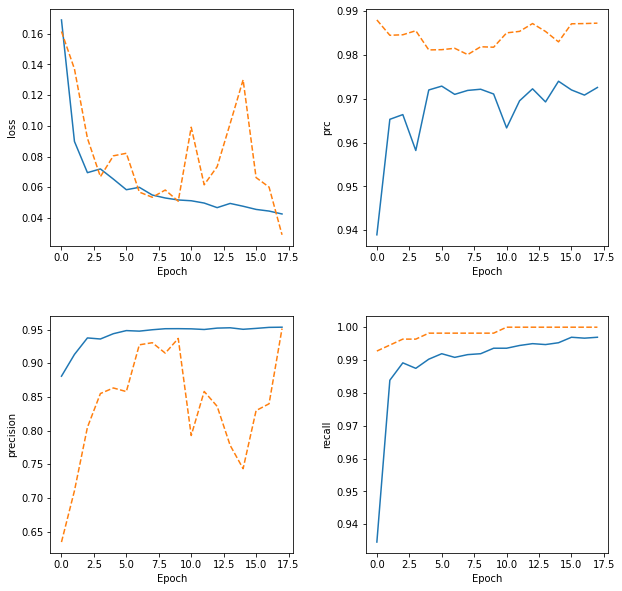

In [40]:
plot_metrics(history)

In [41]:
model = tf.keras.models.load_model('best_temp/')

In [42]:
test_data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Day Sin,Day Cos
date,,,,,,,
2015-02-16 23:04:00,-0.612816,0.935607,-0.649743,0.320997,0.616394,-0.324065,1.305729
2015-02-16 23:05:00,-0.651990,0.924863,-0.649743,0.322794,0.590135,-0.318136,1.307229
2015-02-16 23:06:00,-0.691165,0.935607,-0.649743,0.328187,0.583417,-0.312200,1.308704
2015-02-16 23:06:59,-0.612816,0.959244,-0.649743,0.313806,0.637907,-0.306357,1.310128
2015-02-16 23:08:00,-0.691165,0.935607,-0.649743,0.322195,0.583417,-0.300310,1.311573


In [43]:
# Lets try non sequential loader
def forecasting(model,series, window_size=24, batchsize=32):
    AUTOTUNE = tf.data.experimental.AUTOTUNE
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, drop_remainder=True, shift=1)
    dataset = dataset.flat_map(lambda window: window.batch(window_size))
    dataset = dataset.cache().batch(batchsize).prefetch(AUTOTUNE)
    return model.predict(dataset)

In [44]:
window_size = 60
prediction = forecasting(model, test_data.to_numpy(), window_size=window_size)
prediction = np.where(prediction > 0.5, 1, 0)
prediction.shape

(1997, 1)

In [48]:
target = test_label.to_numpy()[window_size-1:]   # Because all the previous values will be dropped!
target.shape

(1997,)

In [49]:
tf.keras.metrics.Accuracy()(target, tf.squeeze(prediction, axis=-1))

<tf.Tensor: shape=(), dtype=float32, numpy=0.99649477>